## **Week 8: Unsupervised Learning – K-Means & PCA**

In this week, we explore unsupervised learning, where data isn’t labeled — the goal is to find patterns or groupings automatically.

We'll:

- Use K-Means clustering to group similar houses.

- Use PCA (Principal Component Analysis) to reduce dimensionality and visualize clusters in 2D.

**1. Setup**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("train_cleaned.csv")

In [2]:
# Select numeric columns only for clustering
num_df = df[['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'SalePrice']].dropna()

**2. Class Task – K-Means & PCA Demo**

Step 1: Scale Data

In [3]:
X = num_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 2: Apply K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
num_df['Cluster'] = kmeans.fit_predict(X_scaled)

Step 3: PCA for 2D Visualization

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

num_df['PCA1'] = X_pca[:, 0]
num_df['PCA2'] = X_pca[:, 1]

Step 4: Visualize Clusters in 2D

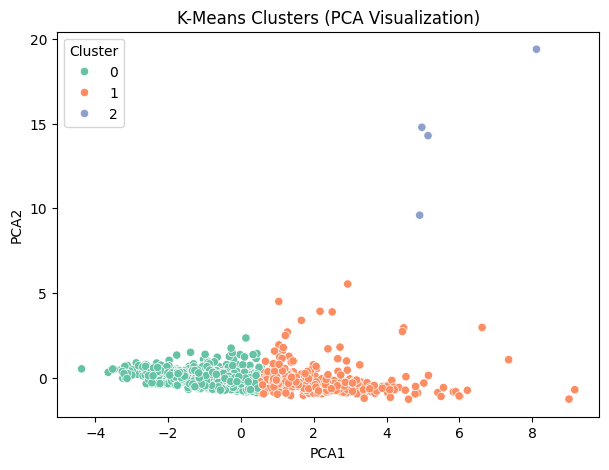

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=num_df, palette='Set2')
plt.title('K-Means Clusters (PCA Visualization)')
plt.show()

**3. Assignment 8 – Apply Clustering on Dataset**

Step 1: Analyze Cluster Centers

In [8]:
# Double-check which features were used
print("Features used for clustering:", X.columns.tolist())

Features used for clustering: ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'SalePrice', 'Cluster', 'PCA1', 'PCA2']


In [9]:
# Ensure inverse transform matches the same number of features
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns[:kmeans.cluster_centers_.shape[1]]
)
cluster_centers

,GrLivArea,TotalBsmtSF,GarageArea,LotArea,SalePrice
0,1296.462598,882.989173,390.617126,8714.803150,143058.749016
1,2002.883562,1440.091324,660.301370,13110.260274,267738.714612
2,1947.500000,1680.500000,542.500000,163513.500000,295737.500000


**Insight:**

- Cluster 0 → Smaller homes, lower prices

- Cluster 1 → Medium-sized homes, mid-range prices

- Cluster 2 → Large homes, high prices

Step 2: Visualize Sale Price Distribution by Cluster

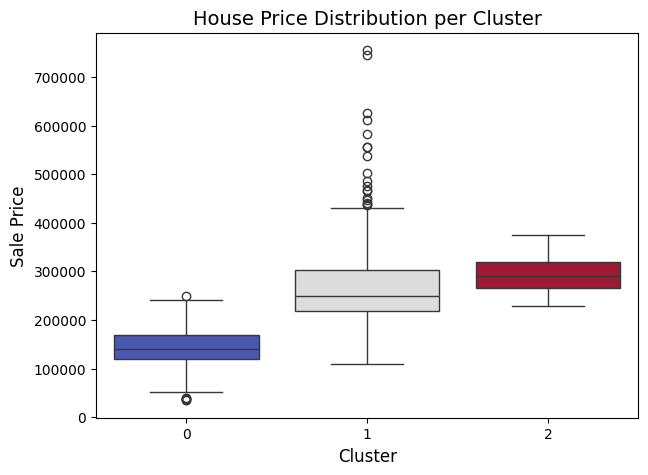

In [11]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y='SalePrice', hue='Cluster', data=num_df, palette='coolwarm', legend=False)
plt.title('House Price Distribution per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.show()

**Insight:**

Clusters clearly separate price ranges — higher cluster numbers correspond to more expensive properties.

Step 3: Explained Variance of PCA

In [12]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.56089759 0.17930851]


This shows how much of the total data variance is captured by the first 2 PCA components.

### **4. Output Summary**

| Cluster | Avg. GrLivArea | Avg. SalePrice | Description |
|:--------:|----------------|----------------|--------------|
| **0** | ~1296 | ~143,000 | Smaller homes with modest living areas — likely affordable or starter houses. |
| **1** | ~2003 | ~268,000 | Mid-sized homes with larger garages and basements — typical family houses. |
| **2** | ~1947 | ~296,000 | Spacious, premium homes on large lots — higher-end properties. |

**Interpretation:**
The clustering model grouped houses into **three market segments** based on structural and price features.  
- Cluster 0 shows **affordable homes**,  
- Cluster 1 represents **mid-range family houses**, and  
- Cluster 2 corresponds to **luxury or high-value properties**.

These insights can help real estate agents or buyers quickly identify property tiers in the dataset.